In [1]:
import numpy as np 

import import_ipynb
from Class_RBC import * 

import matplotlib.pyplot as plt 
from publication_plotstyle import *


importing Jupyter notebook from Class_RBC.ipynb


#### Some notes 

- the run ended abruptly RUN_17= 100,000 - > 90,000
- RUN ended abruptly for RUN_20 10000 --> 8000
- RUN25 is on Frontera 
- RUN_28 ended abruptly 250000 --> 220000
- 

In [2]:
''' INPUT FROM REA FILE '''

iostep = [
            250, 500, 500, 
            500, 500, 500, 
            1000, 1000, 1000, 
            1000, 1000, 2000, 
            2000, 500, 1000,
            4000, 10000, 10000, 
            10000, 2000, 10000,
            10000, 10000, 10000, 
            10000, 10000, 10000,
            10000
        ] 

endstep = [
            3000, 1000, 1000,
            1000, 2000, 2000, 
            5000, 5000, 10000, 
            10000, 10000, 20000,
            20000, 500, 10000,
            40000, 90000, 120000,    
            130000, 8000, 120000,    
            120000, 120000, 120000,
            200000, 200000, 200000,
            220000
        ]

In [3]:
Ra6_params = {
    'Ra':1e6, 
    'Pr':0.707,
    'Gamma':1,
    'visc':8.366600E-04,
    'conduc':1.195220E-03,
    'iostep':iostep,
    'endstep':endstep,
    'nelz':32,
    'N':7,
    'steady_start':22,
    'directory':'/Users/achu/Documents/MTU_Research/Nek5000/run/RBC_working/'
}

Ra6 = RBC(**Ra6_params) 

==== Set Parameters of Study ==== 

RUN1 RUN2 RUN3 RUN4 RUN5 RUN6 RUN7 RUN8 RUN9 RUN_10 RUN_11 RUN_12 RUN_13 RUN_14 RUN_15 RUN_16 RUN_17 RUN_18 RUN_19 RUN_20 RUN_21 RUN_22 RUN_23 RUN_24 RUN_25 RUN_26 RUN_27 RUN_28

Viscosity =  0.00083666
Free Fall Velocity = 0.9950371586530949 	 Free Fall Time = 1.0049875939845532

==== Get Time information ====

steady state times are in between : 
 22.070855 150.83758

==== Get Vertical_Means Objects ====

==== Nusselt Number Collect ====

Steady Start time =  22
Obtained all Nusselt Number data from stdout
Obtained all Nusselt Number data at IO Times
steady state times are in between : 
 22.070855 150.83758

Ensemble averaged Nusselt Number =  8.670006991615917



## Nusselt Number Characteristics


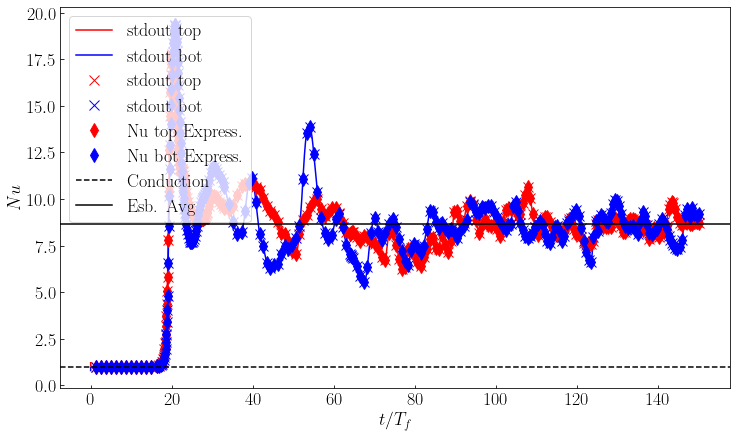

In [4]:
plt.figure(figsize = [12,7])
plt.xlabel('$t/T_f$')
plt.ylabel('$Nu$')

plt.plot(Ra6.time.all_times/Ra6.T_fall,
         Ra6.nusselt.Nu_top_stdout, 'r-', label = 'stdout top')
plt.plot(Ra6.time.all_times/Ra6.T_fall,
         Ra6.nusselt.Nu_bot_stdout, 'b-', label = 'stdout bot')

plt.plot(Ra6.time.iotimes/Ra6.T_fall,
         Ra6.nusselt.Nu_top_io, 'rx', 
         markersize = 10, 
         label = 'stdout top')
plt.plot(Ra6.time.iotimes/Ra6.T_fall,
         Ra6.nusselt.Nu_bot_io, 'bx',
         markersize = 10, 
         label = 'stdout bot')

Ra6.nusselt.Nu_cal_top = [ Ra6.nusselt.Nusselt_where(run, timestep, 1.0) for run in Ra6.nruns 
                  for timestep in Ra6.time.iotimesteps[run] ]
Ra6.nusselt.Nu_cal_bot = [ Ra6.nusselt.Nusselt_where(run, timestep, 0.0) for run in Ra6.nruns 
                  for timestep in Ra6.time.iotimesteps[run] ]

plt.plot(Ra6.time.iotimes/Ra6.T_fall, Ra6.nusselt.Nu_cal_top, 'rd', 
         markersize = 10, label = 'Nu top Express.')
plt.plot(Ra6.time.iotimes/Ra6.T_fall, Ra6.nusselt.Nu_cal_bot, 'bd', 
         markersize = 10, label = 'Nu bot Express.')

plt.axhline(y = 1,color = 'k', linestyle = '--', label = 'Conduction')
plt.axhline(y = Ra6.nusselt.Nu_ensemble_avg,color = 'k',label = 'Esb. Avg')

#plt.legend(loc = 'center left', bbox_to_anchor = (1.04,0.5))
plt.legend(loc = 'upper left')

plt.savefig('Figures/Nu_Plates_vs_time.pdf')

***

## Turbulent Kinetic Energy

Otherwise, the rms velocity of the system. 

- It is most exciting to see the boundary region near plates for ver_rms

- To do : Calculate time averages by the integral:

    $$  \left < \phi \right > _t(z) = \frac{1}{t_2 - t_1}\int _{t1}^{t2} \phi (z,t) dt $$


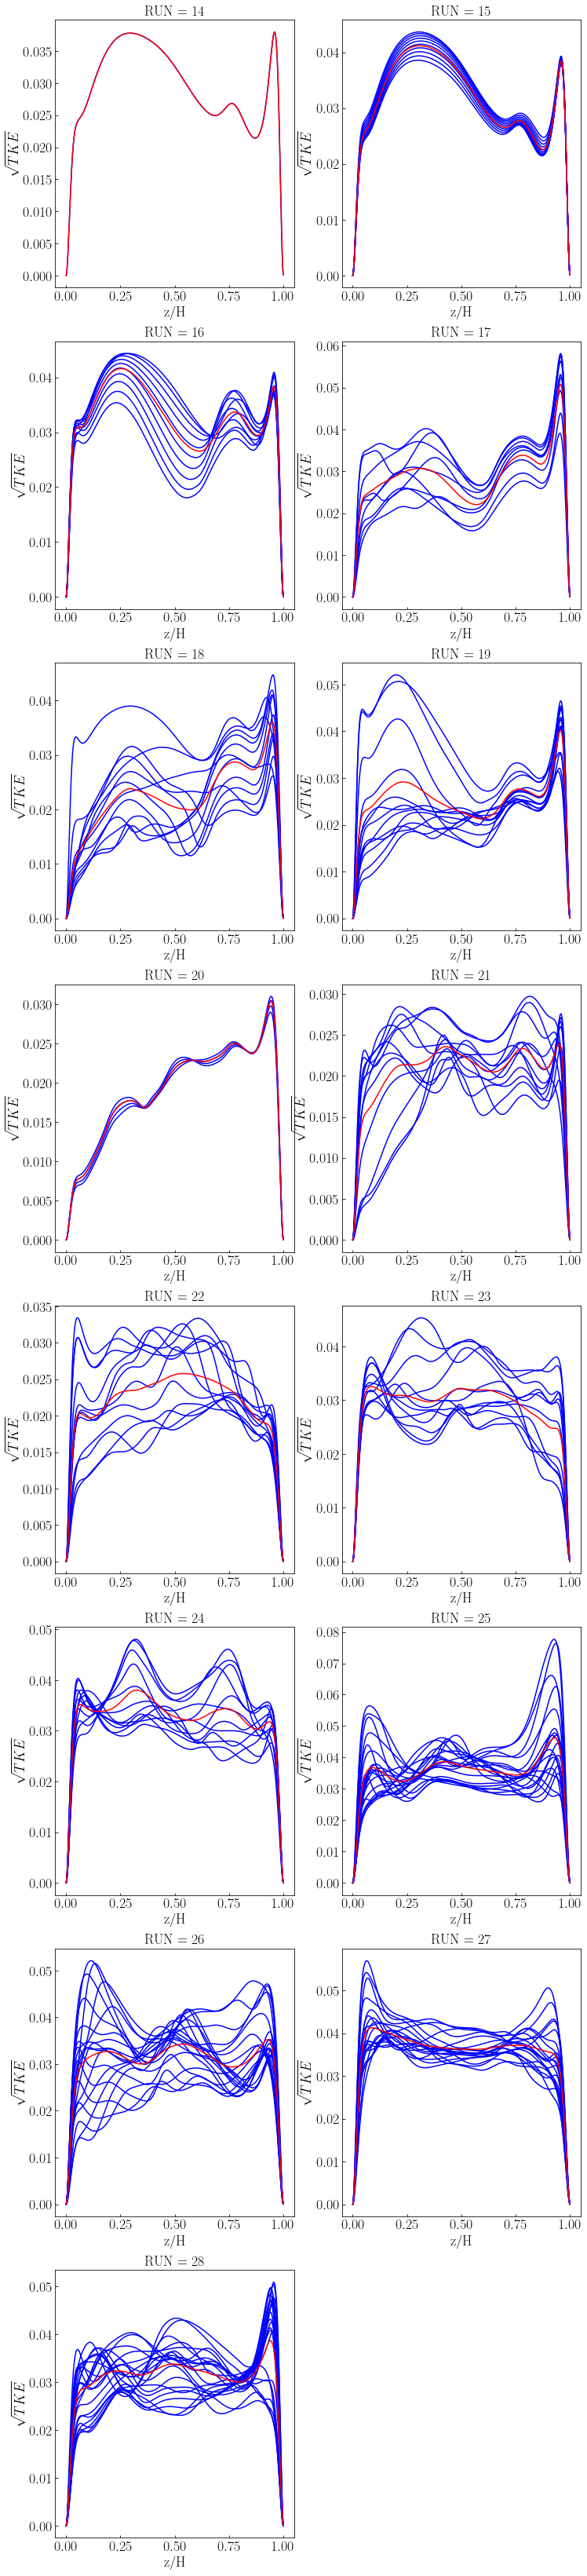

In [5]:
# rms exists only after RUN14:

Ra6.rms_runs = np.arange(14, Ra6.params.nruns[-1] + 1)
plt.figure(figsize = [12, 7 * len(Ra6.rms_runs)//2 + 7])

for run in Ra6.rms_runs:
    plt.subplot(len(Ra6.rms_runs)//2 + (len(Ra6.rms_runs) % 2), 2, 
                                    run + 1 - Ra6.rms_runs[0] )
    plt.xlabel('z/H'); plt.ylabel(r'$\sqrt{TKE}$')
    plt.title(f'RUN = {run}')
    
    for timestep in Ra6.time.iotimesteps[run]:
        rms_at_time = Ra6.ver_rms.get_Vert(run, timestep)
        plt.plot(Ra6.Z, rms_at_time, 'b-')
    
    start = Ra6.time.get_stdoutTime(run, Ra6.time.iotimesteps[run][0])[0]
    start = start/Ra6.T_fall
    stop = Ra6.time.get_stdoutTime(run, Ra6.time.iotimesteps[run][-1])[0]
    stop = stop/Ra6.T_fall
    rms_mean = moving_average(Ra6, Ra6.ver_rms, Ra6.rms_runs, start, stop)
    
    plt.plot(Ra6.Z, rms_mean,'r-')

#plt.savefig('Figures/ver_rms.pdf')

### Obtain a Moving average of rms as a function of time.


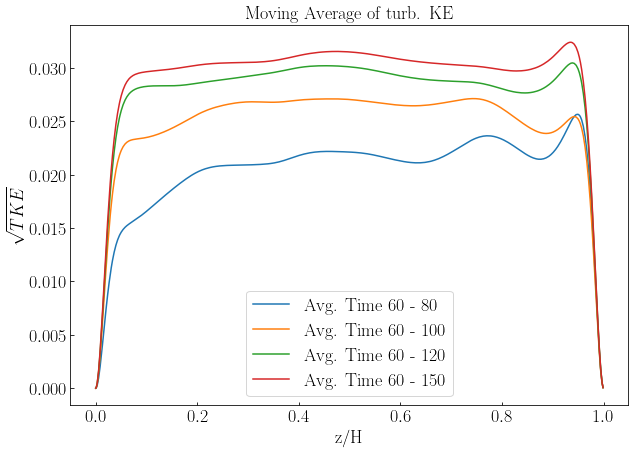

In [6]:
# Plot the moving average for a variety of time.

#rms1 = moving_average(Ra6, Ra6.ver_rms, Ra6.rms_runs, 20, 40)

plt.figure(figsize = [10,7])
plt.xlabel('z/H')
plt.ylabel('$\sqrt{TKE}$')
plt.title('Moving Average of turb. KE')

start = 60
for stop in [80,100,120,150]:
    rms = moving_average(Ra6, Ra6.ver_rms, Ra6.rms_runs, start, stop)
    plt.plot(Ra6.Z, rms, label = f'Avg. Time {start} - {stop}')
plt.legend()

plt.savefig('Figures/TKE_Moving_Avg.pdf')

## Plot Kolmogorov scale and CFL as a function of time



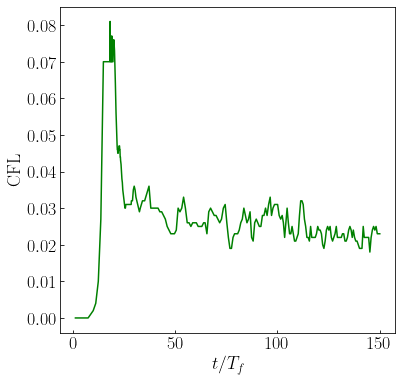

In [7]:
plt.figure(figsize = [6,6])
plt.xlabel('$t/T_f$')
plt.ylabel('CFL')

times = Ra6.time.iotimes/Ra6.T_fall
plt.plot(times, Ra6.time.cour_at_iostep,'g-')

steady state times are in between : 
 22.070855 150.83758



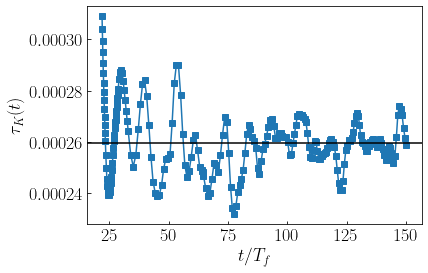

In [8]:
plt.figure()
plt.xlabel('$t/T_f$')
plt.ylabel(r'$\tau_K (t)$')
plt.plot(Ra6.time.steady_states/Ra6.T_fall, Ra6.τ_K_in_time,'s-')
plt.axhline(Ra6.τ_K, color = 'k')

KeyboardInterrupt: 

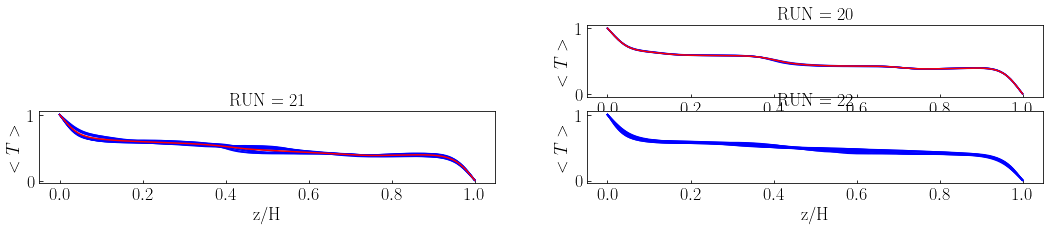

In [9]:
#plot ver_temp and see time_avg_z 

plt.figure(figsize = [18,22]) 

for run in Ra6.nruns[19:]:
    plt.subplot(len(Ra6.nruns)//2 + (len(Ra6.nruns) % 2), 2, 
                                    run)
    
    plt.xlabel('z/H'); plt.ylabel(r'$ <T> $')
    plt.title(f'RUN = {run}')
    
    for timestep in Ra6.time.iotimesteps[run]:
        temp_at_time = Ra6.ver_temp.get_Vert(run, timestep)
        plt.plot(Ra6.Z, temp_at_time, 'b-')
    
    start = Ra6.time.get_stdoutTime(run, Ra6.time.iotimesteps[run][0])[0]
    start = start/Ra6.T_fall
    stop = Ra6.time.get_stdoutTime(run, Ra6.time.iotimesteps[run][-1])[0]
    stop = stop/Ra6.T_fall
    temp_mean = Ra6.ver_temp.TimeAvg_in_z (start, stop)
    
    plt.plot(Ra6.Z, temp_mean,'r-')
        